# Aplicação da PCA para Gerar Embeddings de imagens

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.decomposition import PCA

> Extraindo imagens de nossa base de dados

In [3]:

# Caminho da pasta onde estão as imagens
caminho_pasta = "../../data/cable/train/good"

# Listar arquivos na pasta
arquivos = [f for f in os.listdir(caminho_pasta) if f.endswith((".png"))]

# Verificar tamanho das imagens
for arquivo in arquivos[:5]:  # Exibir apenas as primeiras 5 imagens
    img = Image.open(os.path.join(caminho_pasta, arquivo))
    print(f"Imagem: {arquivo} | Tamanho: {img.size}")  

Imagem: 000.png | Tamanho: (1024, 1024)
Imagem: 001.png | Tamanho: (1024, 1024)
Imagem: 002.png | Tamanho: (1024, 1024)
Imagem: 003.png | Tamanho: (1024, 1024)
Imagem: 004.png | Tamanho: (1024, 1024)


> Verificando tamanhos máximo,mínimo e médio das imagens

In [4]:
larguras = []
alturas = []

for arquivo in arquivos:
    img = Image.open(os.path.join(caminho_pasta, arquivo))
    largura, altura = img.size
    larguras.append(largura)
    alturas.append(altura)

# Estatísticas básicas
print(f"Tamanho médio: {np.mean(larguras):.1f} x {np.mean(alturas):.1f}")
print(f"Tamanho mínimo: {np.min(larguras)} x {np.min(alturas)}")
print(f"Tamanho máximo: {np.max(larguras)} x {np.max(alturas)}")

Tamanho médio: 1024.0 x 1024.0
Tamanho mínimo: 1024 x 1024
Tamanho máximo: 1024 x 1024


> Plotando as 5 primeiras imagens de nossa base 

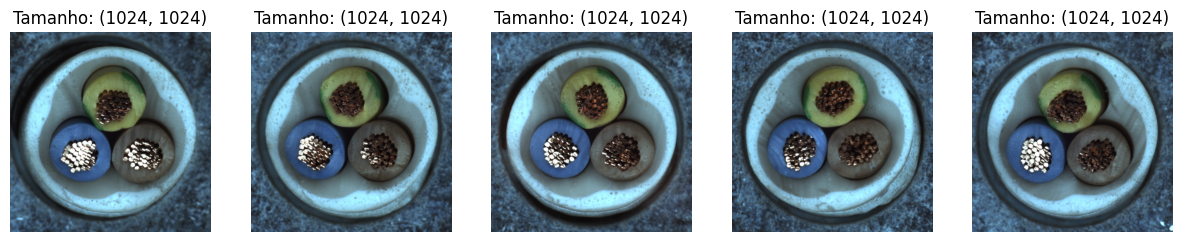

In [5]:
# Definir quantas imagens exibir
num_imgs = min(5, len(arquivos))

# Criar um grid de plots
fig, axes = plt.subplots(1, num_imgs, figsize=(15, 5))

for i, arquivo in enumerate(arquivos[:num_imgs]):
    img = Image.open(os.path.join(caminho_pasta, arquivo))
    axes[i].imshow(img)
    axes[i].set_title(f"Tamanho: {img.size}")
    axes[i].axis("off")

plt.show()

> Aqui iremos criar uma função que coleta as imagens em nossa base e as converte para um vetor

In [6]:
# Função para carregar imagens e converter para vetores
def carregar_imagens(pasta):
    imagens = []
    arquivos = [f for f in os.listdir(pasta) if f.endswith(".png")]

    for arquivo in arquivos:
        img = Image.open(os.path.join(pasta, arquivo)).convert("L")  # Converter para escala de cinza
        imagens.append(np.array(img).flatten())  # Transformar a imagem em vetor

    return np.array(imagens)

> Aplicando a função iremos converter nossas imagens para escala de cinza e "achatar" as imagens utilizando .flatten().
> Assim temos para cada linha 1024*1024 colunas, correspondentes a cada pixel da imagem 

In [7]:
# Carregar apenas as imagens originais
imagens_originais = carregar_imagens(caminho_pasta)

print(f"Formato do conjunto original: {imagens_originais.shape}")

Formato do conjunto original: (224, 1048576)


In [16]:
# Aplicar PCA apenas no conjunto original
n_componentes = 224  # Número de componentes principais

pca = PCA(n_components=n_componentes)
embeddings_originais = pca.fit_transform(imagens_originais)

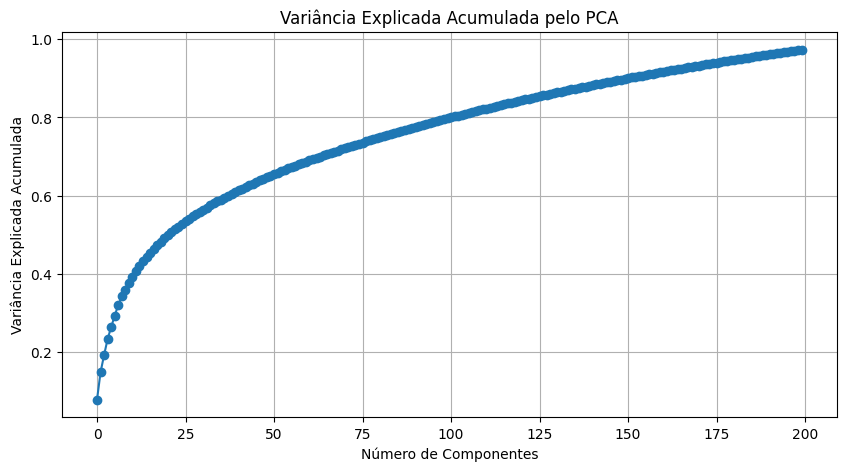

In [9]:
# Obter variância explicada acumulada
variancia_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Plotar variância acumulada
plt.figure(figsize=(10, 5))
plt.plot(variancia_acumulada, marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Variância Explicada Acumulada pelo PCA")
plt.grid(True)
plt.show()



In [19]:
# Encontrar o número mínimo de componentes para explicar 95% da variância
num_ideal_componentes = np.argmax(variancia_acumulada >= 0.95) + 1
print(f"Número ideal de componentes para 95% da variância: {num_ideal_componentes}")

Número ideal de componentes para 95% da variância: 183


In [13]:
print(f"Formato dos embeddings: {embeddings_originais.shape}")

Formato dos embeddings: (224, 224)


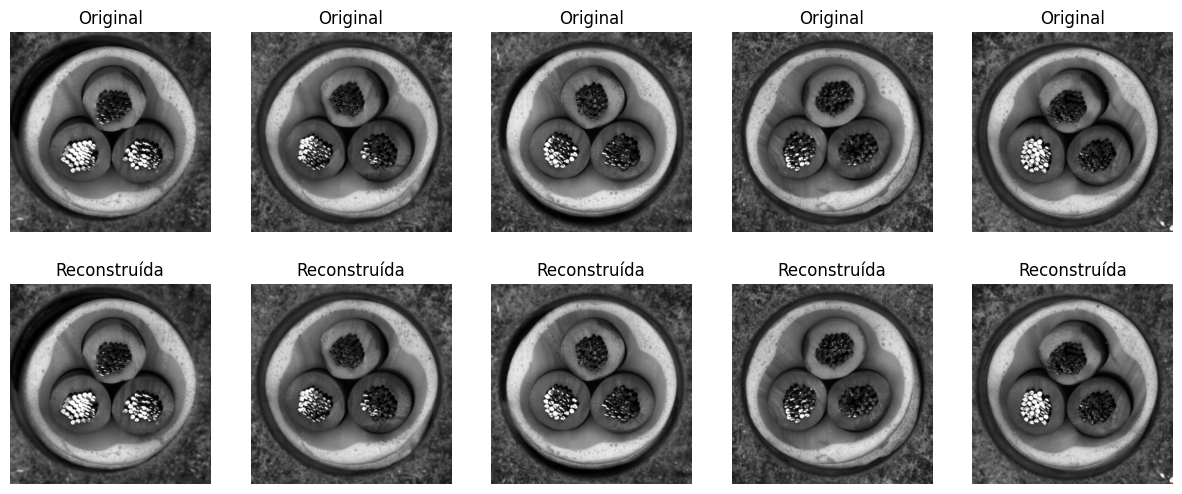

In [21]:
# Reconstruir as imagens a partir dos embeddings usando a transformação inversa do PCA
# Isso reverte a redução de dimensionalidade e tenta aproximar as imagens originais
imagens_reconstruidas = pca.inverse_transform(embeddings_originais)

# Determinar o tamanho original das imagens
# Cada imagem foi achatada em um vetor 1D, então precisamos converter de volta para 2D
# Assumimos que as imagens são quadradas, então pegamos a raiz quadrada do número total de pixels
altura, largura = imagens_originais.shape[1]**0.5, imagens_originais.shape[1]**0.5
altura, largura = int(altura), int(largura)  # Convertendo para valores inteiros

# Definir quantas imagens queremos exibir
num_imgs = 5

# Criar uma figura com 2 linhas e 'num_imgs' colunas
# A primeira linha mostrará as imagens originais e a segunda as imagens reconstruídas
fig, axes = plt.subplots(2, num_imgs, figsize=(15, 6))

for i in range(num_imgs):
    # Obter a imagem original e reformatar para 2D
    img_original = imagens_originais[i].reshape(altura, largura)
    axes[0, i].imshow(img_original, cmap="gray")  # Mostrar em tons de cinza
    axes[0, i].set_title("Original")  # Título da imagem
    axes[0, i].axis("off")  # Remover eixos para melhor visualização

    # Obter a imagem reconstruída e reformatar para 2D
    img_reconstruida = imagens_reconstruidas[i].reshape(altura, largura)
    axes[1, i].imshow(img_reconstruida, cmap="gray")  # Mostrar em tons de cinza
    axes[1, i].set_title("Reconstruída")  # Título da imagem
    axes[1, i].axis("off")  # Remover eixos para melhor visualização

# Exibir o gráfico com as imagens originais e reconstruídas lado a lado
plt.show()

